In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul  1 15:18:37 2022

@author: zinge
"""

import urllib.request
from matplotlib import axes, axis
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
import matplotlib.dates as mdates
import datetime as dt
import matplotlib as mpl
from matplotlib import cm
from pandas.tseries.frequencies import to_offset
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from datetime import datetime
import os
from numpy import linspace, zeros, array
#from scipy.signal import savgol_filter

# define names of files
filename1 = "Station1.csv"
filename2 = "Station2.csv"
filename3 = "Station3.csv"

# define what to download
channels1 = "1777871"
channels2="1766721"
channels3="1777982"
fields = "1,2,3,4,5,6"
minutes = "1"

# download using Thingspeak's API 1
url = f"https://api.thingspeak.com/channels/{channels1}/fields/{fields}.csv?minutes={minutes}"
data = urllib.request.urlopen(url)
d = data.read()

# save data to csv
file = open(filename1, "w")
file.write(d.decode('UTF-8'))
file.close()

# download using Thingspeak's API 2
url = f"https://api.thingspeak.com/channels/{channels2}/fields/{fields}.csv?minutes={minutes}"
data = urllib.request.urlopen(url)
d = data.read()

# save data to csv
file = open(filename2, "w")
file.write(d.decode('UTF-8'))
file.close()

# download using Thingspeak's API 3
url = f"https://api.thingspeak.com/channels/{channels3}/fields/{fields}.csv?minutes={minutes}"
data = urllib.request.urlopen(url)
d = data.read()

# save data to csv
file = open(filename3, "w")
file.write(d.decode('UTF-8'))
file.close()

# opening files as data frames
station1 = pd.read_csv("Station1.csv")
station2 = pd.read_csv("Station2.csv")
station3 = pd.read_csv("Station3.csv")

# defining the file containing all average tempartures and sensor locations (the main file)
filename4 = "Final Sensor Locations & Measurments.csv"
df4 = pd.read_csv(filename4)

# calculating mean temp for each sensor
avg_box1_sht1 = station1['field1'].mean()
avg_box1_sht2 = station1['field2'].mean()
avg_box1_ds1_15 = station1['field3'].mean()
avg_box1_ds1_11 = station1['field4'].mean()
avg_box1_ds1_13 = station1['field5'].mean()
avg_box1_ds1_14 = station1['field6'].mean()
avg_box2_sht1 = station2['field1'].mean()
avg_box2_sht2 = station2['field2'].mean()
avg_box2_ds1_7 = station2['field3'].mean()
avg_box2_ds1_8 = station2['field4'].mean()
avg_box2_ds1_9 = station2['field5'].mean()
avg_box2_ds1_10 = station2['field6'].mean()
avg_box3_sht1 = station3['field1'].mean()
avg_box3_sht2 = station3['field2'].mean()
avg_box3_ds1_16 = station3['field3'].mean()
avg_box3_ds1_18 = station3['field4'].mean()
avg_box3_ds1_17 = station3['field5'].mean()
avg_box3_ds1_19 = station3['field6'].mean()

# creating a list of all the means
mean_list = [avg_box1_sht1, avg_box1_sht2, avg_box1_ds1_15, avg_box1_ds1_11, avg_box1_ds1_13,
             avg_box1_ds1_14, avg_box2_sht1, avg_box2_sht2, avg_box2_ds1_7, avg_box2_ds1_8,
             avg_box2_ds1_9, avg_box2_ds1_10, avg_box3_sht1, avg_box3_sht2, avg_box3_ds1_16,
             avg_box3_ds1_18, avg_box3_ds1_17, avg_box3_ds1_19]

# updating the main file
df4['temp_c'] = mean_list
# replacing negative temp reads with 'nan'
df4['temp_c']=df4['temp_c'].mask(df4['temp_c'].gt(60) | df4['temp_c'].lt(0), np.nan)

C:\Users\zinge\AppData\Local\Temp\ipykernel_9232\1795037101.py:3: DeprecationWarning: Please use `Rbf` from the `scipy.interpolate` namespace, the `scipy.interpolate.rbf` namespace is deprecated.
  from scipy.interpolate.rbf import Rbf  # radial basis functions


Text(0.5, 1.0, 'RBF Gaussian interpolation')

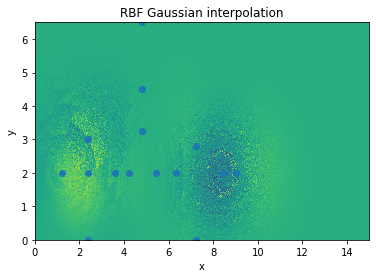

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate.rbf import Rbf  # radial basis functions

# x y arrays
x = df4.lengh_m
y = df4.width_m
t = df4.temp_c

#RBF Func
rbf_fun = Rbf(x, y, t, function='gaussian')

x_new = np.linspace(0, 15, 2000)
y_new = np.linspace(0, 6.5, 1000)

x_grid, y_grid = np.meshgrid(x_new, y_new)
t_new = rbf_fun(x_grid.ravel(), y_grid.ravel()).reshape(x_grid.shape)

plt.pcolor(x_new, y_new, t_new)
plt.plot(x, y, 'o')
plt.xlabel('x'); plt.ylabel('y')
plt.title('RBF Gaussian interpolation')